###  DESCRIPCIÓN DEL PROYECTO

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad

* name: nombre del barrio
* neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis

* cab_id: código del vehículo
* vehicle_id: ID técnico del vehículo
* company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes

* trip_id: código del viaje
* cab_id: código del vehículo que opera el viaje
* start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
* end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
* duration_seconds: duración del viaje en segundos
* distance_miles: distancia del viaje en millas
* pickup_location_id: código del barrio de recogida
* dropoff_location_id: código del barrio de finalización

tabla weather_records: datos sobre el clima

* record_id: código del registro meteorológico
* ts: fecha y hora del registro (tiempo redondeado a la hora)
* temperature: temperatura cuando se tomó el registro
* description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

Etapas de analisis

1  DESCRIPCIÓN DEL PROYECTO,

2  PREPARAR LOS DATOS.

2.1  IMPORTACIÓN DE LIBRERIAS.

3  PREPARACIÓN DE DATOS.

3.1  DATAFRAME CABS

3.2  DATAFRAME TRIPS

3.3  DATAFRAME WEATHER

3.3.1  ENRIQUECIMIENTO DE DATOS

4  ANALISIS ESTADISTICO.

4.1  LOS 10 PRINCIPALES BARRIOS EN TERMINOS DE FINALIZACIÓN DE RECORRIDOS

4.2  LAS EMPRESAS DE TAXIS CON MAYOR NUMERO DE VIAJES

4.3  LOS 10 PRINCIPALES BARRIOS QUE REALIZAN MAS VIAJES

5  PRUEBA DE HIPOTESIS

5.1  DURACIÓN PROMEDIO DE LOS VIAJES DESDE LOOP HASTA EL AEROPUERTO INTERNACIONAL O'HARE

6  CONCLUSIÓN GENERAL

### PREPARAR LOS DATOS.

#### IMPORTACIÓN DE LIBRERIAS.

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats as st
from scipy.stats import levene
import scipy.stats as stats

In [3]:
# Importar DataFrame
cabs = pd.read_csv('/datasets/project_sql_result_01.csv')
trips = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv') 

In [4]:
print(cabs.head())
print(trips.head())
print(weather.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


### PREPARACIÓN DE DATOS.

#### DATAFRAME CABS

In [6]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
cabs.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [8]:
cabs.value_counts()

company_name                  trips_amount
0118 - 42111 Godfrey S. Awir  33              1
1085 - 72312 N and W Cab Co   29              1
Checker Taxi                  1486            1
Checker Taxi Affiliation      2216            1
Chicago Carriage Cab Corp     9181            1
                                             ..
6057 - 24657 Richard Addo     13              1
6574 - Babylon Express Inc.   31              1
6742 - 83735 Tasha Ride Inc   39              1
6743 - 78771 Luhak Corp       33              1
Yellow Cab                    9888            1
Length: 64, dtype: int64

Este dataframe cuenta con dos columnas:
* <b>company_name,</b> contiene los nombres de las compañias, no hay valores duplicados ni ausentes;
* <b>trips_amount,</b> contiene la cantidad de viajes por compañia, no hay valores ausentes.

#### DATAFRAME TRIPS

In [9]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
trips['dropoff_location_name'].value_counts()

Englewood          1
West Lawn          1
Auburn Gresham     1
Garfield Ridge     1
West Town          1
                  ..
Douglas            1
Old Town           1
Washington Park    1
Chinatown          1
East Village       1
Name: dropoff_location_name, Length: 94, dtype: int64

Contamos con 2 columnas:
* <b>dropoff_location_name,</b> almacena el nombre de los barrios, no hay valores ausentes o duplicados;
* <b>average_trips,</b> cuenta con valores decimales, sin embargo, por que la columna almacena un promedio y los decimales pueden ser importantes por ese motivo se opta dejarlo tal como esta.

#### DATAFRAME WEATHER

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
weather.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [12]:
weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Contamos con solo tres columnas, 
* <b>start_ts,</b> debemos cambiar el formato a formato de fecha;
* <b>weather_conditions,</b> vamos a analizar que valores contamos;
* <b>duration_seconds,</b> podriamos cambiar los valores float a int pero desconocemos si podemos tener perdida de información, así que dejaremos por el momento la columna como esta.

In [44]:
# Verificamos con que valores unicos contamos con la funcion value_counts()
weather['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

Revisando los valores unicos almacenados en 'weather_conditions' tenemos que solo existen dos valores, 'Good' que consideramos como condiciones de clima normales y 'Bad' que consideramos como días lluviosos. 

In [39]:
#Se transforma la columna 'start_ts' a formato timestamp para poder trabajar y extraer información posteriormente
weather['start_ts'] = pd.to_datetime(weather['start_ts'], format='%Y-%m-%dT%H:%M:%S')


             start_ts weather_conditions  duration_seconds day_of_week
0 2017-11-25 16:00:00               Good            2410.0    Saturday
1 2017-11-25 14:00:00               Good            1920.0    Saturday
2 2017-11-25 12:00:00               Good            1543.0    Saturday
3 2017-11-04 10:00:00               Good            2512.0    Saturday
4 2017-11-11 07:00:00               Good            1440.0    Saturday


In [43]:
#comprobamos el cambio de formato
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


##### ENRIQUECIMIENTO DE DATOS 

In [ ]:
weather['day_of_week'] = weather['start_ts'].dt.day_name()
print(weather.head())

Se realizo el cambio de formato de la fecha, asi posteriormente extraer el día de la semana al que pertenece cada fecha y almacenarlo en una nueva columna llamada 'day_of_week' para que sea mucho más sencillo agrupar los datos.

### ANALISIS ESTADISTICO.

#### LOS 10 PRINCIPALES BARRIOS EN TERMINOS DE FINALIZACIÓN DE RECORRIDOS 

In [52]:
#TOP 10 de los principales barrios
top_trips = trips.sort_values(by='average_trips',ascending= False)
print(top_trips)
      #.plot(kind="bar"))

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


Esta información es de suma importancia para saber en que zonas deberian estar circulando los taxis o colocar sitios cerca de las zonas donde existen mayor número de viajes y evitar los barrios con menos viajes.

#### LAS EMPRESAS DE TAXIS CON MAYOR NUMERO DE VIAJES

<AxesSubplot:title={'center':'Número de viajes por empresa de taxis'}, xlabel='Empresa de taxis', ylabel='Número de viajes'>

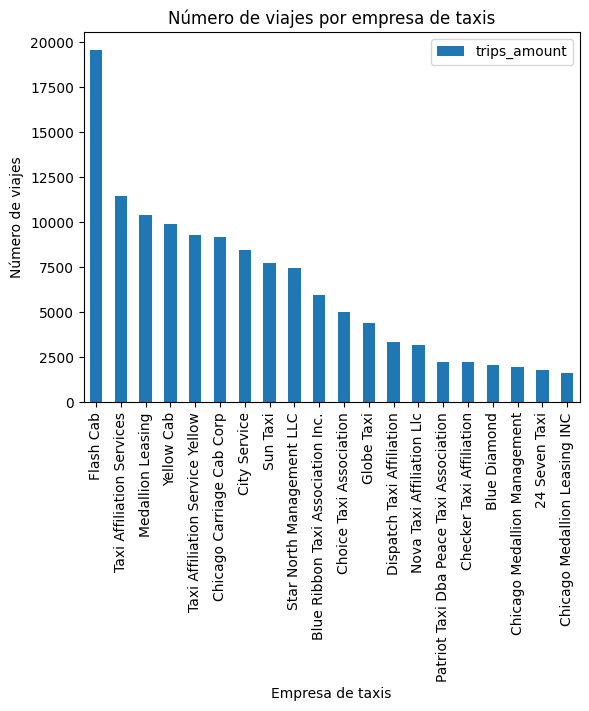

In [51]:
cabs.sort_values(by='trips_amount',ascending=False).head(20).plot(
    kind="bar", 
    x= 'company_name',
    y= 'trips_amount',
    title= 'Número de viajes por empresa de taxis',
    ylabel= 'Número de viajes',
    xlabel= 'Empresa de taxis'
)


Esta información nos sirve de partida para hacer una investigación acerca del servicio y los precios de las empresas mas populares, asi nosotros como zuber crear un servicio con las caracteristicas de vehiculos, precios y algun agregado que tenga la competencia, asi logrando que nuestro servicio sea competitivo con las empresas que dominan el mercado actualmente.

#### LOS 10 PRINCIPALES BARRIOS QUE REALIZAN MAS VIAJES

<AxesSubplot:title={'center':'TOP 10 Principales barrios que realizan más viajes'}, xlabel='Barrio', ylabel='Promedio de viajes'>

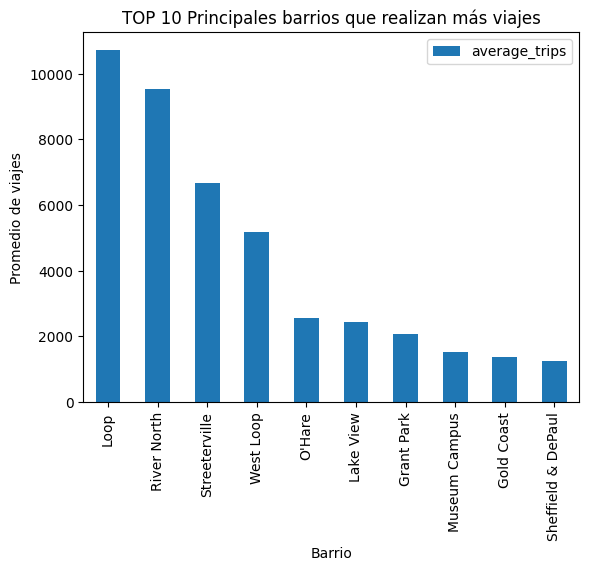

In [53]:
trips.sort_values(by='average_trips',ascending= False).head(10).plot(
    kind="bar", 
    x= 'dropoff_location_name',
    y= 'average_trips',
    title= 'TOP 10 Principales barrios que realizan más viajes',
    ylabel= 'Promedio de viajes',
    xlabel= 'Barrio'
)


Como ya se habia mencionado, el conocer los barrios con mayor número de viajes nos ayuda a crear estrategias para posicionarnos en el mercado, por ejemplo, ofrecer descuentos si el viaje se realiza desde alguno de estos puntos, quedando apenas por debajo del precio promedio de la competencia, haciendo que nuestro servicio sea mas competitivo y sea mas utilizado. 

### PRUEBA DE HIPOTESIS

#### DURACIÓN PROMEDIO DE LOS VIAJES DESDE LOOP HASTA EL AEROPUERTO INTERNACIONAL O'HARE

Comprobación si "La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los dias lluviosos en sábado.

In [38]:
#filtro para los días sábados
weather_saturdays = weather[weather['day_of_week'] == 'Saturday'][['day_of_week','duration_seconds','weather_conditions']]
#filtro para los días lluviosos
weather_rainy_saturdays = weather_saturdays[weather_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
#filtro para los días sábados
weather_good_saturdays = weather_saturdays[weather_saturdays['weather_conditions'] == 'Good']['duration_seconds']


In [37]:
alpha = 0.05# tu código: establece un nivel crítico de significación estadística


stat, p_value = stats.levene(weather_rainy_saturdays, weather_good_saturdays)


alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: las varianzas son iguales")
else:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales")
    


No se rechaza la hipótesis nula: las varianzas son iguales


Utilizamos levene para comprobar si las varianzas son iguales. obteniendo que las varianzas de ambas variables son iguales.

In [36]:
results = st.ttest_ind(weather_rainy_saturdays, weather_good_saturdays, equal_var=True)

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido

if (results.pvalue > alpha): # su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.517970327099473e-12
No podemos rechazar la hipótesis nula


Para saber si hay una relación en el aumento de la duración promedio de los viajes en un día sabado lluvioso, debemos compararlo con la duración promedio de los viajes realizados los días sábado con clima bueno. 

* Así que vamos a filtrar el dataframe 'weather' para que en primera instancia solo nos arroje los dias sábados,

* En segundo lugar, vamos a realizar dos filtros en la columna 'weather_conditions' donde la condición 'Bad' seran los días lluviosos y la condición 'Good' seran los días soleados. Cada uno se almacenara en un nuevo dataframe para compararlos posteriormente.

* Finalmente, utilizamos T de Student para determinar si nuestra hipotesis se aprueba o se rechaza.

En conclusión, nuestra hipotesis nula no puede ser rechazada por lo que existe una relación entre el aumento en la duración de los viajes realizados los días sábados en un día lluvioso desde Loop al Aeropuerto Internacional O'Hare.

### CONCLUSIÓN GENERAL

En conclusión, logramos importar los datos que trabajamos anteriormente desde SQL, lo cual ha facilitado mucho la tarea para trabajar con python, ya que contamos con los dataframe pre-filtrados con solo la información que nos es relevante. Así mismo, solo se han realizado unos pequeños ajustes a las tablas para poder trabajar con ellas, en ninguno de los casos contamos con valores ausentes o duplicados, sin embargo, en la tabla weather contamos con una fecha que tuvimos que formatear y posteriormente extrajimos el número de la semana para poder hacer un filtro por día posteriormente.

En la parte de analis estadistico, logramos identificar los barrios con mayores viajes, mientras que algunos apenas tienen viajes otros cuentan con bastante información que nos puede ser util para analizar. Al igual de cuales son las empresas con mayor número de viajes, lo cual nos permite crear un perfil el cual busca un usuario de un servicio de taxi. Y cuales son las zonas con mayor flujo de posibles clientes.

Finalmente, comprobamos que existe una relación en el promedio de duración de un viaje los días sabados con condiciones de lluvia, lo cual podria traducirse a una cuota mayor bajo estas condiciones para mantener rentable nuestro servicio, debido a la duración. 

Adicionalmente, cabe destacar que apesar de que contamos con mas tablas, el pretrabajar